In [1]:
import sys, glob, io, os
from PIL import Image, ImageOps, ImageFont
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import torch.nn as nn
from torchvision.utils import save_image

from preprocessing.font2img import draw_single_char, draw_example, draw_handwriting
from preprocessing.package import pickle_examples
from utils import centering_image, denorm_image, normalize_image, add_padding, tight_crop_image
from data_loader.data_loader import TrainDataProvider, save_fixed_sample


In [2]:
handwriting_path = "./data/user_image.png"
handwriting = Image.open(handwriting_path).convert('L')
handwriting = np.array(handwriting)
height, width = handwriting.shape
handwriting = resize(handwriting, (height, width), preserve_range=True)
handwriting = Image.fromarray(handwriting)
handwriting = handwriting.crop(box=(width/100 * 3.2, height/100 * 2.28, width/100 * 96.4, height/100 * 96.7))
print(handwriting.size)

arranged_width, arranged_height = handwriting.size
all_row_size = arranged_height / 14

title_row = arranged_height / 36.7
target_row = all_row_size - title_row
target_col = arranged_width / 15

chars = []
for i in range(14):
    row = handwriting.crop(box=(0, i * all_row_size + title_row, arranged_width, i * all_row_size + title_row + target_row))
    for j in range(15):
        char = row.crop(box=(j * target_col, 0, (j + 1) * target_col, target_row))
        char = char.resize((128, 128))
        char = np.array(char)
        char = normalize_image(char)
        round_function = lambda i: 1 if i > 0.96 else i
        char = np.array(list(map(round_function, char.flatten()))).reshape(128, 128)
#         char = tight_crop_image(char)
#         h, w = char.shape
#         char = imresize(char, (int(h * 1.3), int(w * 1.3)))
#         char = normalize_image(char)
#         char = add_padding(char, pad_value=1)
        # char = centering_image(char)
        chars.append(char)
len(chars)

(948, 1359)


210

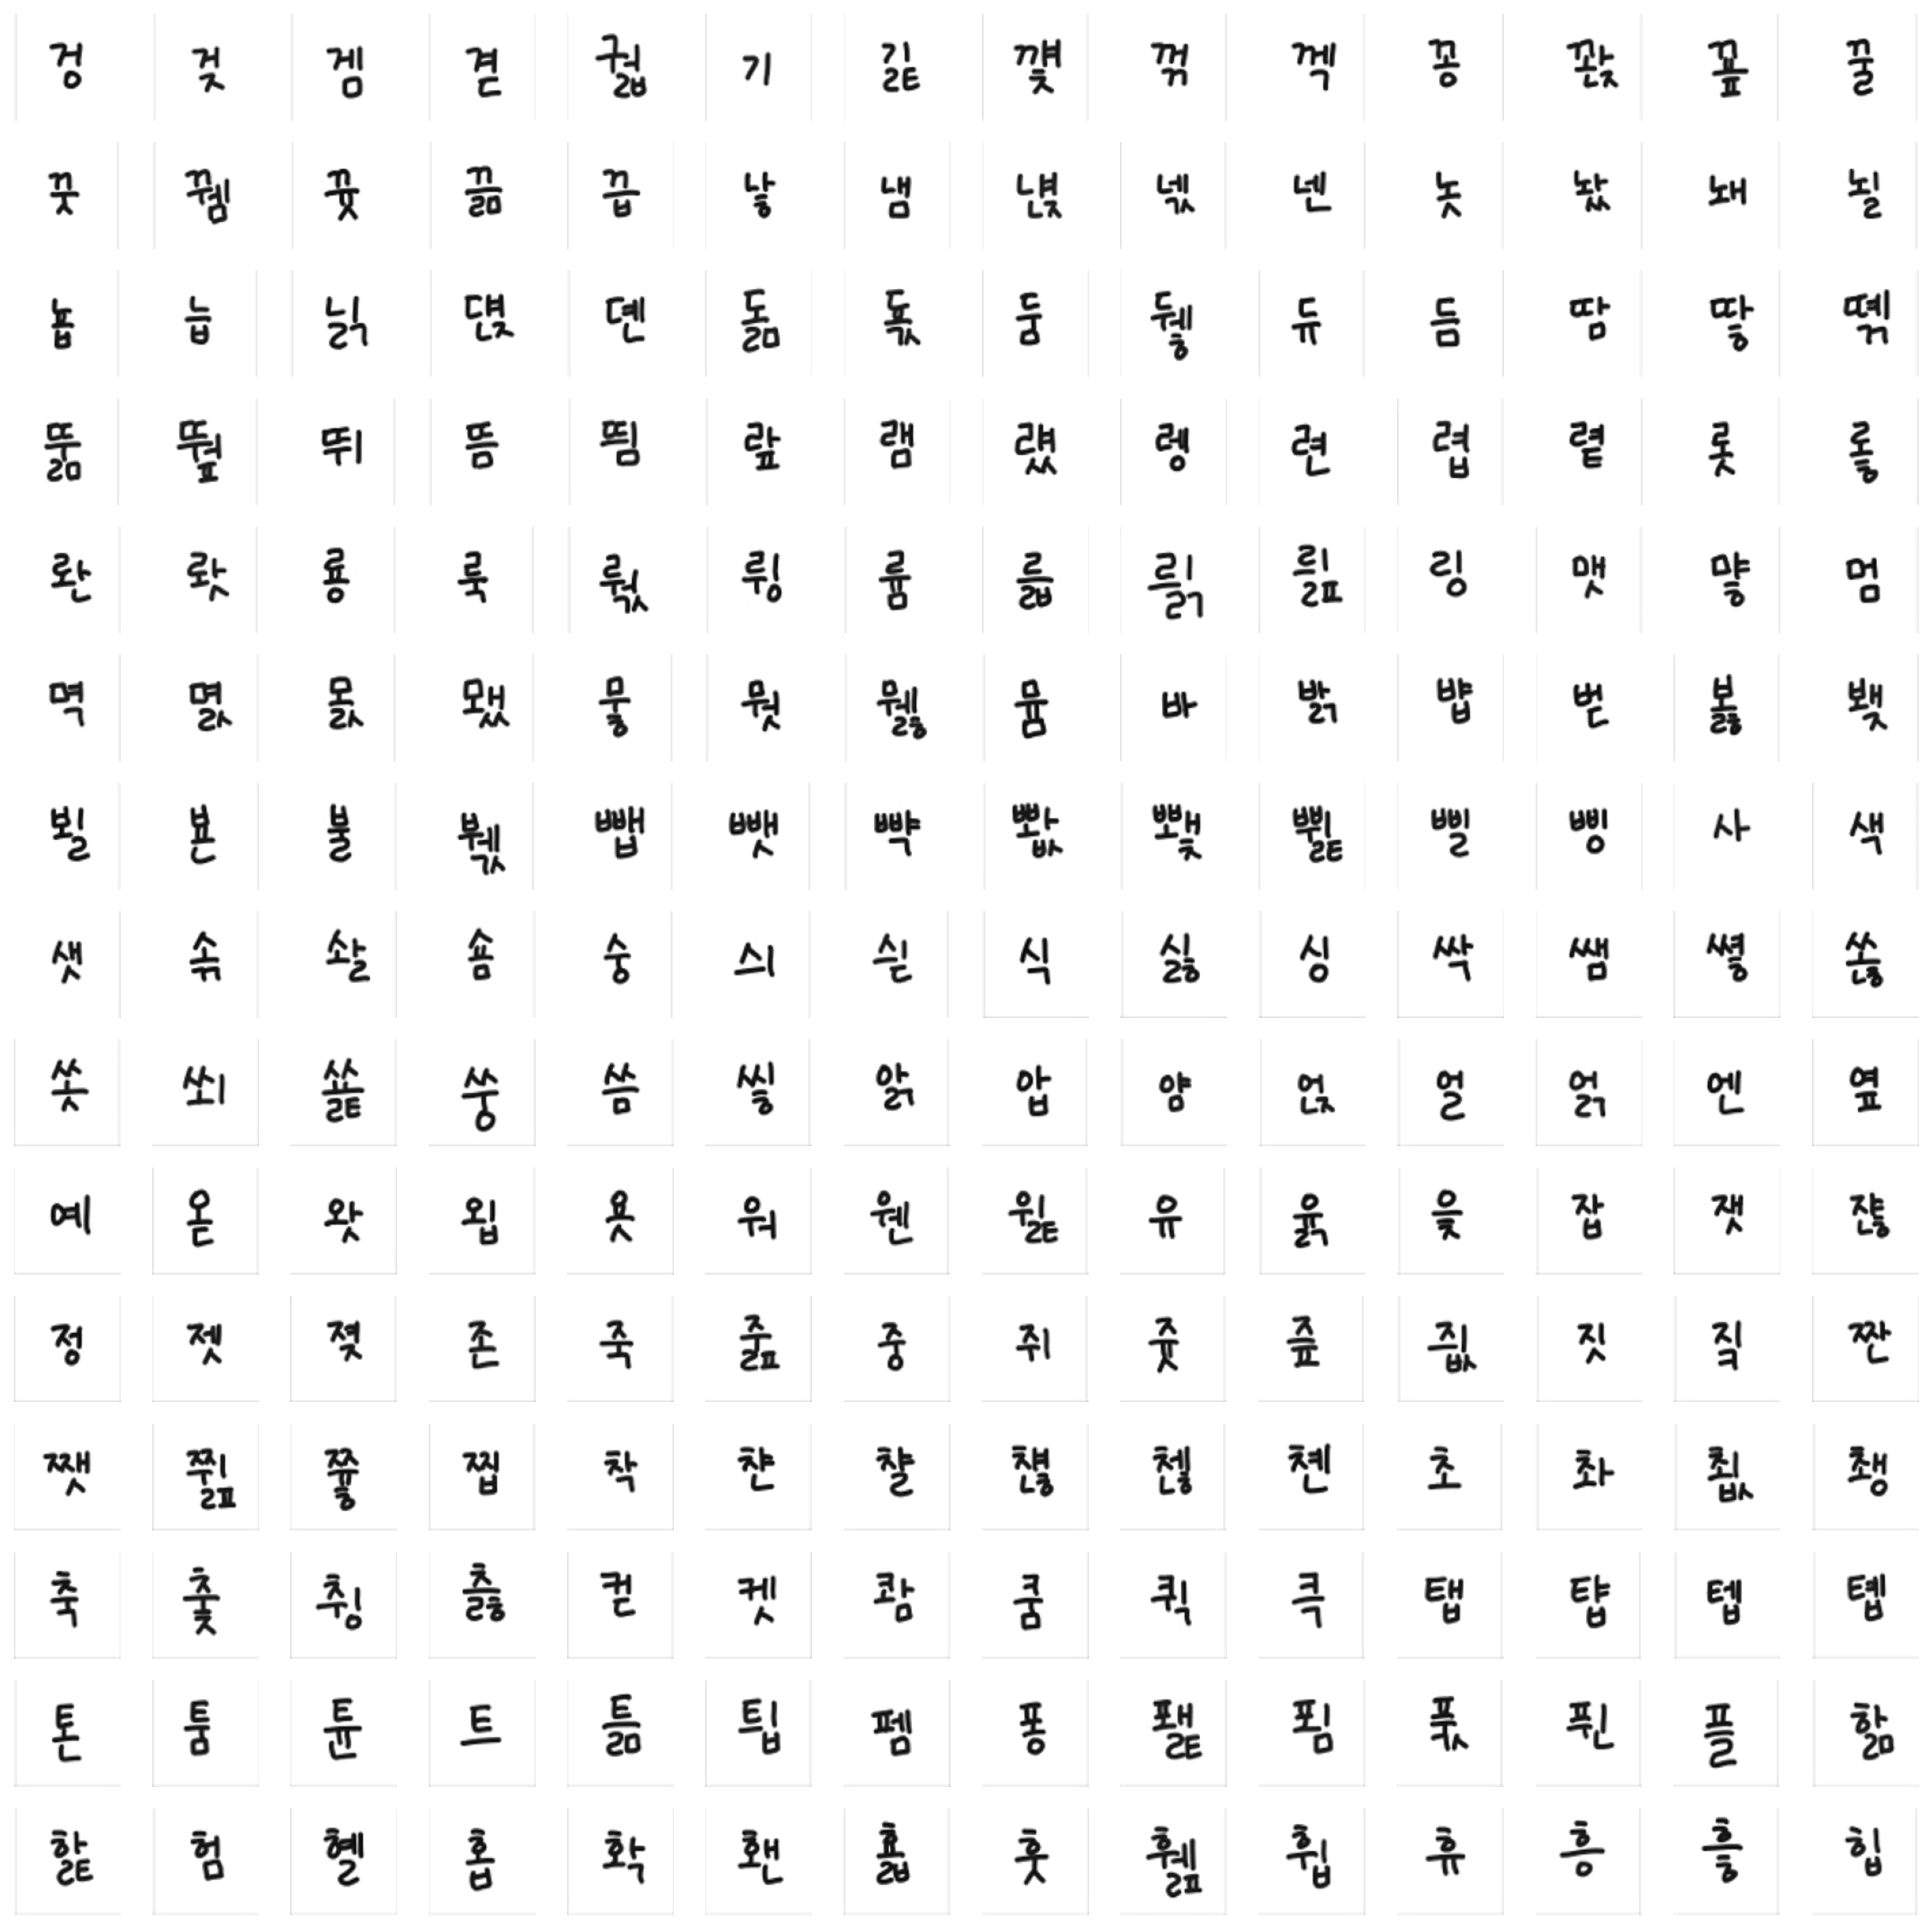

In [3]:
plt.figure(figsize=(18, 18))
for idx, char in enumerate(chars):
    plt.subplot(15, 14, idx+1)
    plt.imshow(char, cmap='gray')
    plt.axis('off')
plt.show()

In [232]:
count = 0
font_label = 0
canvas_size = 128
src_char_size = 90

save_path = "./data/handwriting"

file_path = './preprocessing/2350-common-hangul.txt'
with open(file_path) as f:
    charset_2350 = f.read().split('\n')
charset_2350 = charset_2350[:-1]
print(len(charset_2350))
print(charset_2350[:5], '~', charset_2350[-5:])

charset_210 = ['겅', '겆', '겜', '겯', '궓', '기', '긽', '꺷', '꺾', '껙', '꽁', '꽍', '꾶', '꿀', \
               '꿋', '뀀', '뀻', '끎', '끕', '낳', '냄', '냱', '넧', '넨', '놋', '놨', '놰', '뇔', \
               '뇹', '늡', '닑', '댽', '뎬', '돎', '됷', '둠', '뒣', '듀', '듬', '땀', '땋', '뗶', \
               '뚦', '뛒', '뛰', '뜸', '띔', '랖', '램', '럤', '렝', '련', '렵', '렽', '롯', '롷', \
               '롼', '뢋', '룡', '룩', '뤇', '륑', '륨', '륿', '릙', '릞', '링', '맷', '먛', '멈', \
               '멱', '멼', '몴', '뫴', '뭏', '뭣', '뭻', '뮴', '바', '밝', '뱝', '벋', '봃', '뵂', \
               '뵐', '뵨', '불', '붻', '뺍', '뺐', '뺙', '뽮', '뾏', '쀭', '삘', '삥', '사', '색', \
               '샛', '솎', '솰', '숌', '숭', '싀', '싇', '식', '싫', '싱', '싹', '쌤', '쎻', '쏞', \
               '쏫', '쐬', '쑕', '쑹', '씀', '앃', '앍', '압', '얌', '얹', '얼', '얽', '엔', '옆', \
               '예', '옫', '왓', '욉', '욧', '워', '웬', '윑', '유', '윩', '읓', '잡', '잿', '쟎', \
               '정', '젯', '졎', '존', '죽', '줊', '중', '쥐', '쥿', '즢', '즶', '짓', '짘', '짠', \
               '쨋', '쮪', '쯓', '찝', '착', '챤', '챨', '첂', '첺', '쳰', '초', '촤', '쵒', '쵕', \
               '축', '춫', '췽', '츯', '컫', '켓', '쾀', '쿰', '퀵', '큭', '탭', '턉', '텝', '톕', \
               '톤', '툼', '튠', '트', '틂', '틥', '펨', '퐁', '퐱', '푐', '푻', '퓐', '플', '핢', \
               '핥', '험', '혤', '홉', '확', '홴', '횳', '훗', '휊', '휩', '휴', '흥', '흫', '힙']

if not os.path.exists(save_path):
    os.mkdir(save_path)
    
for idx, char in enumerate(chars):
    char = Image.fromarray(char.astype('float32')).convert('L')
    charid = charset_2350.index(charset_210[idx])
    char.save(os.path.join(save_path, "%d_%04d.png" % (font_label, charid)))
    count += 1
    if count % 50 == 0:
        print("processed %d chars" % count)
font_label += 1
print("processed %d chars, end" % count)

2418
['가', '각', '간', '갇', '갈'] ~ ['푻', '핢', '횳', '휊', '흫']
processed 50 chars
processed 100 chars
processed 150 chars
processed 200 chars
processed 210 chars, end


In [7]:
SRC_PATH = './fonts/source/'
src_font = glob.glob(os.path.join(SRC_PATH, '*.ttf'))[0]
src_font = ImageFont.truetype(src_font, size=src_char_size)
src_font

In [ ]:
count = 0
font_label = 0
canvas_size = 128
src_char_size = 90

save_path = "./data/handwriting"
save_path = os.path.join(save_path, '_210chars/')
if not os.path.exists(save_path):
    os.mkdir(save_path)
if not os.path.exists(save_path):
    os.mkdir(save_path)

for idx, char in enumerate(chars):
    c = charset_210[idx]
    charid = charset_2350.index(c)
    e = draw_handwriting(c, src_font, canvas_size, save_path, font_label, charid)
    if e:
        e.save(os.path.join(save_path, "%d_%04d.png" % (font_label, charid)))
        count += 1
    if count % 50 == 0:
        print("%d font: processed %d chars" % (font_label, count))
print("processed %d chars, end" % count)

In [9]:
sample_size = 24
img_size = 128

data_dir = "./data/handwriting/210chars"

save_fixed_sample(sample_size, img_size, data_dir, data_dir, resize_fix=1.3)

unpickled total 210 examples
train examples -> 210


In [11]:
fixed_source = torch.load(os.path.join(data_dir, 'fixed_source.pkl'))
fixed_target = torch.load(os.path.join(data_dir, 'fixed_target.pkl'))
fixed_label = torch.load(os.path.join(data_dir, 'fixed_label.pkl'))

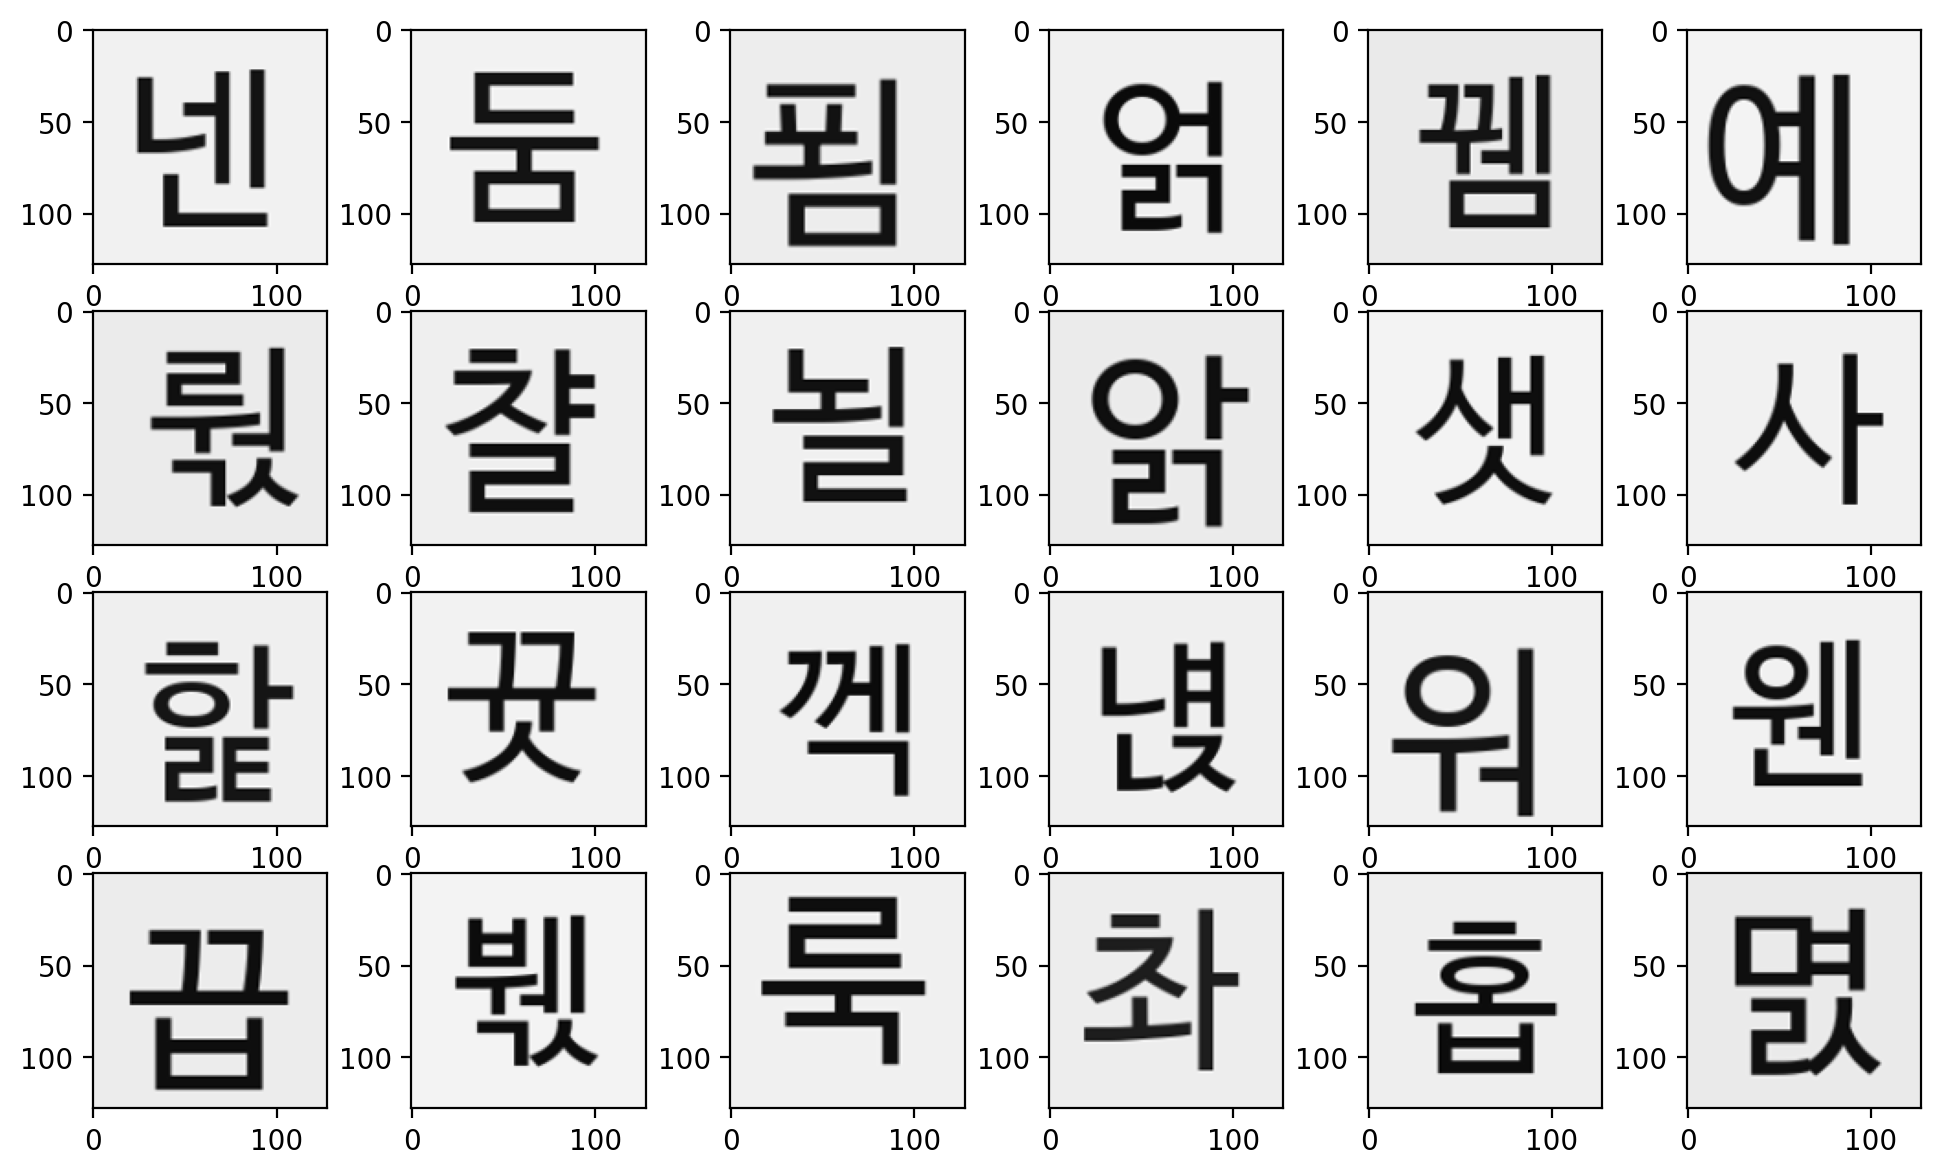

In [12]:
plt.figure(figsize=(12, 7))
for idx, image in enumerate(fixed_source):
    plt.subplot(4, 6, idx+1)
    plt.imshow(image.reshape(128, 128).cpu().numpy(), cmap='gray')
plt.show()

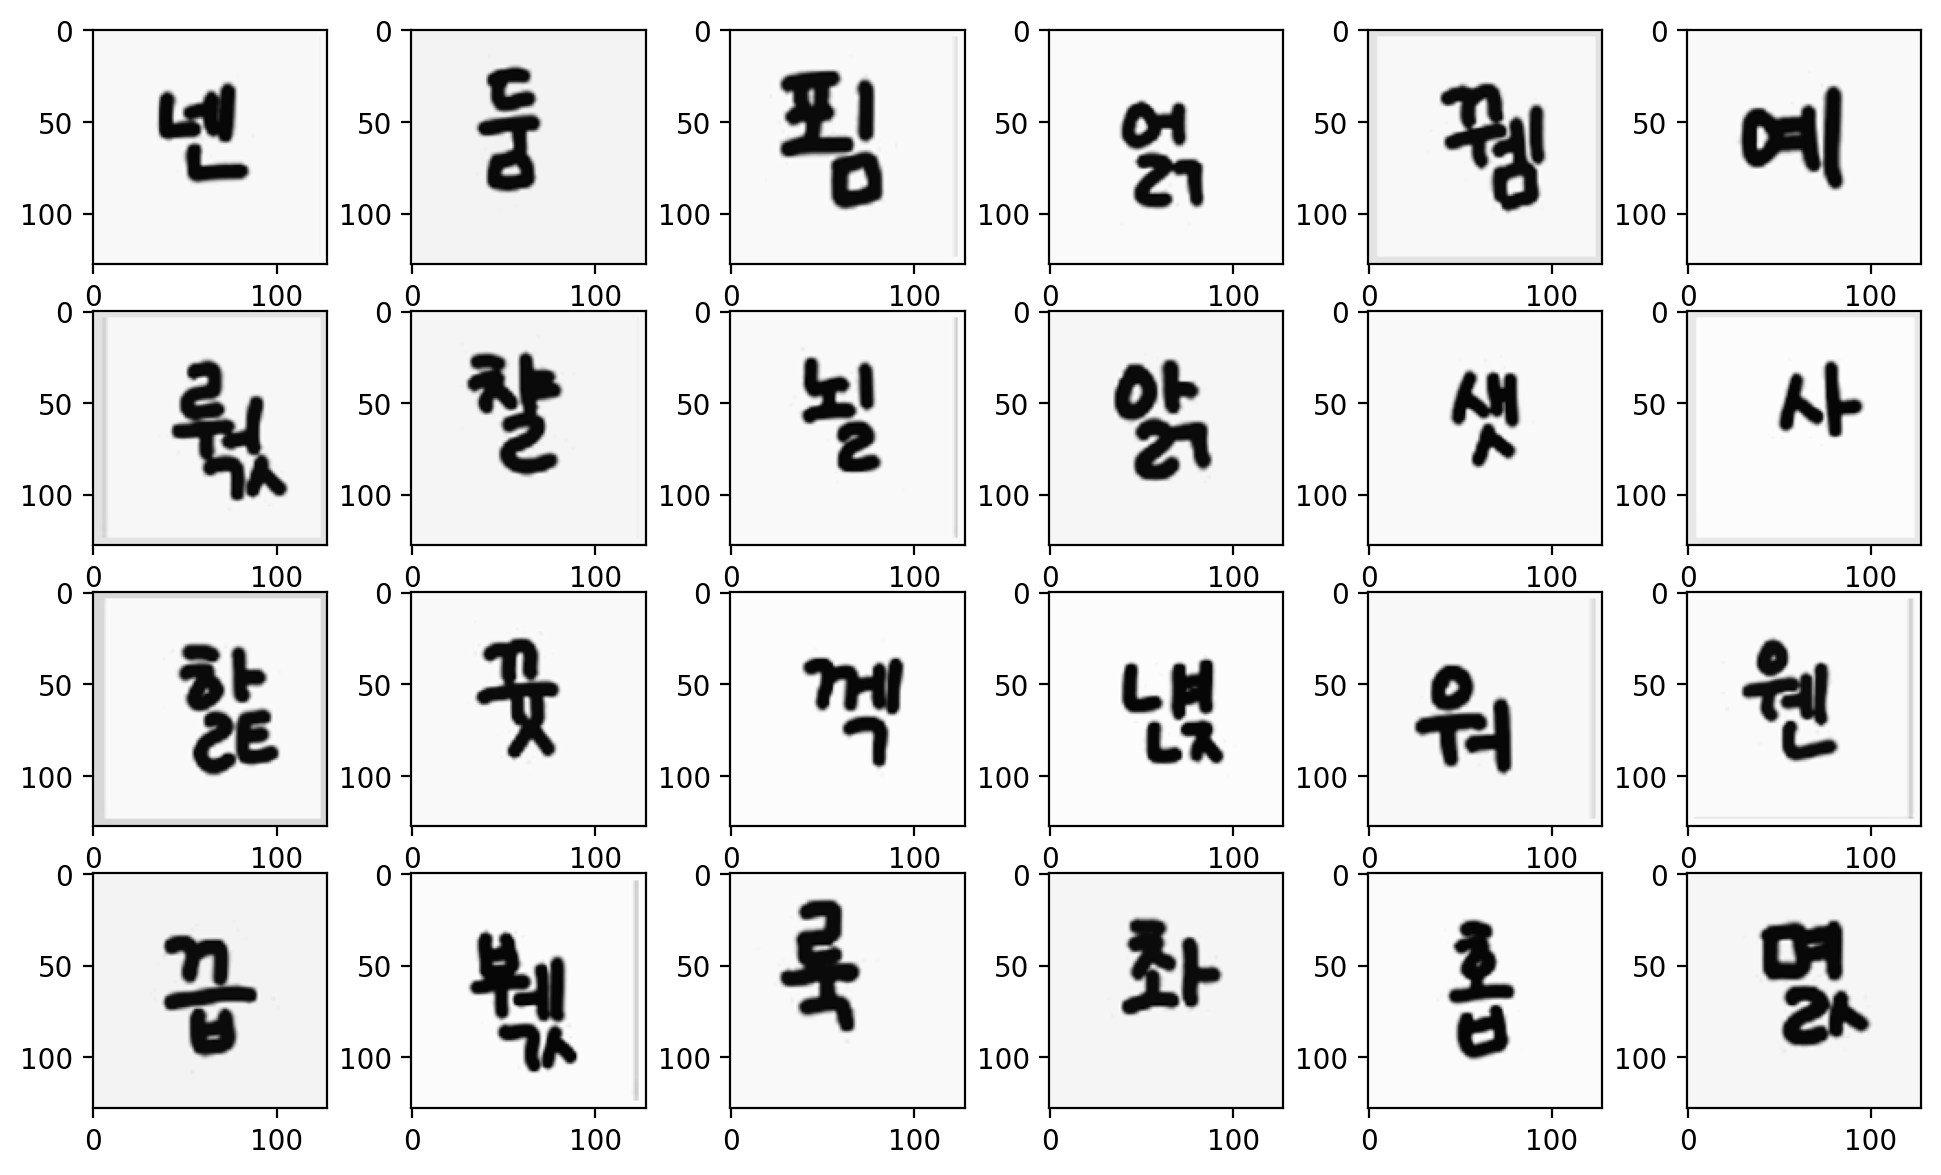

In [13]:
plt.figure(figsize=(12, 7))
for idx, image in enumerate(fixed_target):
    plt.subplot(4, 6, idx+1)
    plt.imshow(image.reshape(128, 128).cpu().numpy(), cmap='gray')
plt.show()

In [ ]:
save_image(denorm_image(fixed_target.data), \
           os.path.join(data_dir, '_Ground_truth_target.png'), \
           nrow=6, pad_value=255)